<a href="https://colab.research.google.com/github/eyalgur1/Computer_Vision__Huggning_Face_Community_CV_Course/blob/main/computer_vision_pyramid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# LaTeX and Google Drive configuration

!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra dvipng texlive-fonts-recommended cm-super


plt.rcParams.update({
    "text.usetex": True,             # Use LaTeX for all text
    "font.family": "serif",          # Use serif fonts
    "font.serif": ["Computer Modern Roman"],  # Use Computer Modern Roman font
    "text.latex.preamble": r"\usepackage{amsmath}",  # Load additional packages
    "font.size": 16,                 # Default font size
    "axes.titlesize": 16,            # Title font size
    "axes.labelsize": 16,            # Axis labels font size
    "xtick.labelsize": 10,           # X-tick labels font size
    "ytick.labelsize": 10,           # Y-tick labels font size
    "legend.fontsize": 14            # Legend font size
})

from google.colab import drive
drive.mount("/content/drive/")

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 128 kB in 4s (33.3 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (

## **Alaisin and Anti-Aliasing with Gaussian Smoothing**

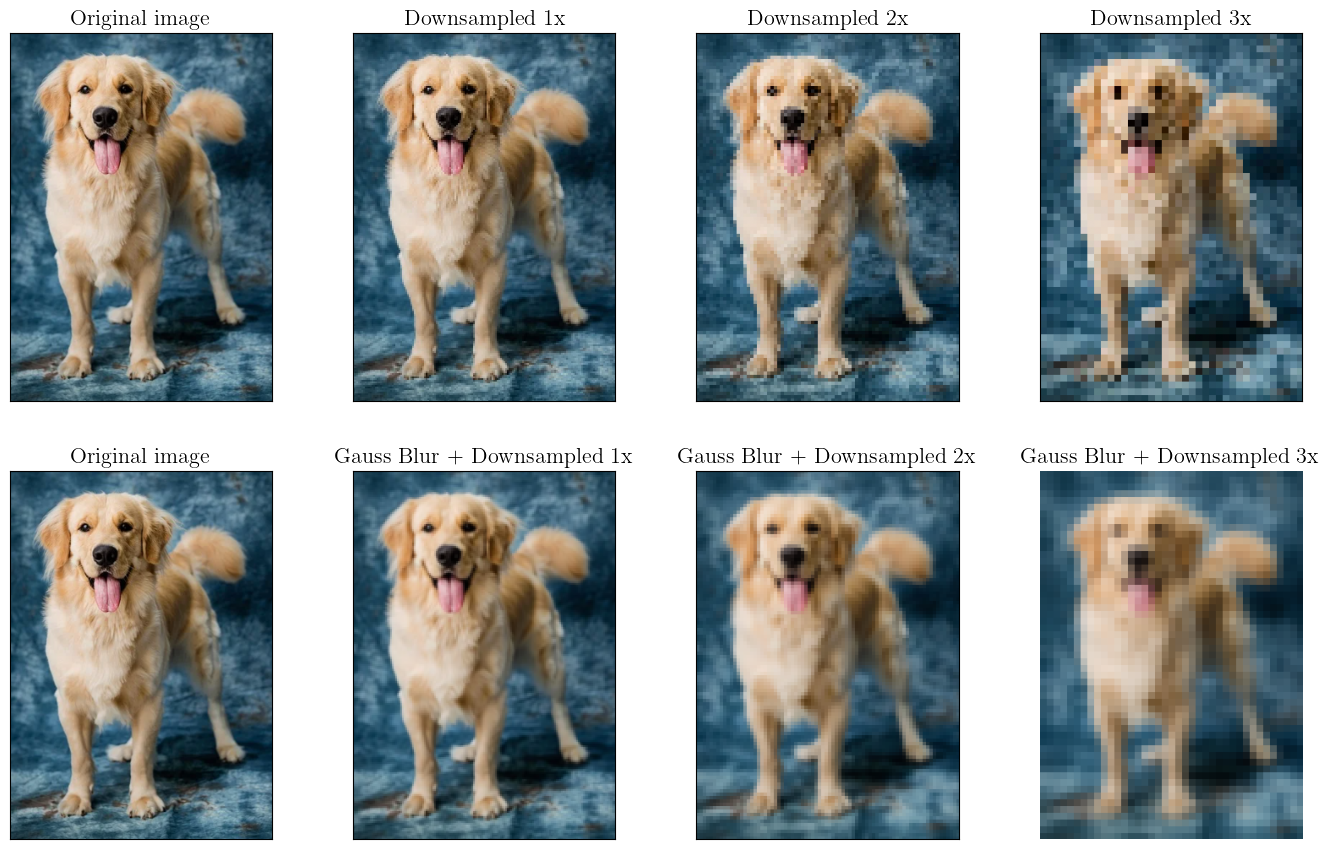

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
image_cv2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Computer_Vision/CV_figs/dog.PNG', 1)
image = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)/255.0

# Function to downsample an image by removing every other row and column
def downsample(image):
    return image[::2, ::2]

# Function to apply Gaussian blur and then downsample
def gaussian_blur_downsample(image, ksize=5, sigma=1):
    blurred_image = cv2.GaussianBlur(image, (ksize, ksize), sigma)
    return downsample(blurred_image)

# Downsample twice without Gaussian blur
downsampled1 = downsample(image)
downsampled2 = downsample(downsampled1)
downsampled3 = downsample(downsampled2)

# Downsample twice with Gaussian blur
blurred_downsampled1 = gaussian_blur_downsample(image)
blurred_downsampled2 = gaussian_blur_downsample(blurred_downsampled1)
blurred_downsampled3 = gaussian_blur_downsample(blurred_downsampled2)

# Resize images to the original size for display
resized_downsampled1 = cv2.resize(downsampled1, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
resized_downsampled2 = cv2.resize(downsampled2, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
resized_downsampled3 = cv2.resize(downsampled3, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
resized_blurred_downsampled1 = cv2.resize(blurred_downsampled1, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
resized_blurred_downsampled2 = cv2.resize(blurred_downsampled2, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
resized_blurred_downsampled3 = cv2.resize(blurred_downsampled3, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# How `interpolation=cv2.INTER_NEAREST` works:
# When an image is resized (either up or down), the new pixel grid may not align perfectly with the original pixel grid.
# The INTER_NEAREST method assigns the value of the nearest pixel from the original image to the new pixel grid.
# For instance, if we are enlarging an image, each new pixel in the enlarged image takes the value of the closest pixel in the original image.
# If we are reducing the image size, each pixel in the reduced image corresponds directly to the closest pixel in the original image.

# Plot all images
f, ax = plt.subplots(2,4, figsize=(14,9))
ax[0,0].imshow(image); ax[0,0].set_title('Original image'); plt.axis('off')  # display original image
ax[0,1].imshow(resized_downsampled1); ax[0,1].set_title('Downsampled 1x'); plt.axis('off')
ax[0,2].imshow(resized_downsampled2); ax[0,2].set_title('Downsampled 2x'); plt.axis('off')
ax[0,3].imshow(resized_downsampled3); ax[0,3].set_title('Downsampled 3x'); plt.axis('off')
ax[1,0].imshow(image); ax[1,0].set_title('Original image'); plt.axis('off')  # display original image
ax[1,1].imshow(resized_blurred_downsampled1); ax[1,1].set_title('Gauss Blur + Downsampled 1x'); plt.axis('off')
ax[1,2].imshow(resized_blurred_downsampled2); ax[1,2].set_title('Gauss Blur + Downsampled 2x'); plt.axis('off')
ax[1,3].imshow(resized_blurred_downsampled3); ax[1,3].set_title('Gauss Blur + Downsampled 3x'); plt.axis('off')
plt.tight_layout()
# remove xticks and yticks
for i in range (2):
  for j in range (4):
    ax[i,j].set_xticks([]); ax[i,j].set_yticks([])
plt.show()

## **Gaussain and Laplacian Pyramids**

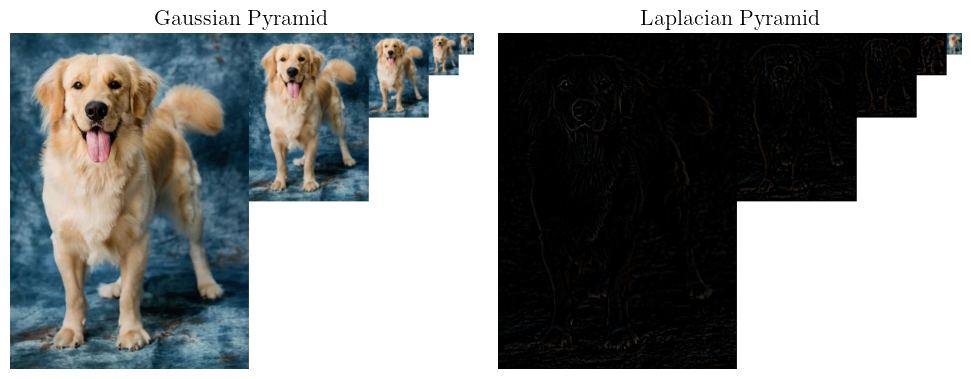

In [3]:
import cv2
from matplotlib import pyplot as plt

# Load an image
image_cv2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Computer_Vision/CV_figs/dog.PNG', 1)
image = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)/255.0

# Function to generate Gaussian pyramid (there is a built-it cv2 function for this)
def gaussian_pyramid(image, levels=5, ksize=5, sigma=1):
    pyramid = [image]
    for i in range(1, levels):
        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(pyramid[-1], (ksize, ksize), sigma)
        # Downsample the image by removing every other row and column
        downsampled_image = blurred_image[::2, ::2, :]  # (we could use cv2.pyrDown for this)
        pyramid.append(downsampled_image)
    return pyramid

# Function to generate Laplace pyramid from Gaussian pyramid (there is a built-it cv2 function for this)
def laplace_pyramid(gaussian_pyramid):
    laplace_pyramid = []
    for i in range(len(gaussian_pyramid) - 1):
        # Upsample the next level in the Gaussian pyramid by doubling the number of rows and doubling the number of columns by inserting new pixel every other row/column and using nearest pixel technique to decide the value of the new pixels
        upsampled_image = cv2.pyrUp(gaussian_pyramid[i + 1])
        # Ensure that the upsampled image matches the size of the current level (as for odd or even number of ros/columns there could be up to 1 pixel difference in size due to downsampling/upsampling)
        upsampled_image = cv2.resize(upsampled_image, (gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0]))
        # Calculate the Laplacian image
        laplacian = gaussian_pyramid[i] - upsampled_image
        laplace_pyramid.append(laplacian)
    # The last image in the Laplace pyramid is just the last image in the Gaussian pyramid
    laplace_pyramid.append(gaussian_pyramid[-1])
    return laplace_pyramid

# Function to concatenate pyramid images side by side with a white background (for plotting)
def concatenate_pyramid_images(pyramid):
    # Find the maximum height in the pyramid
    max_height = max([img.shape[0] for img in pyramid])

    # Resize each image to have the same height by adding white constant background and using top,bottom,left,right borders
    resized_images = [cv2.copyMakeBorder(img, 0, max_height - img.shape[0], 0, 0, cv2.BORDER_CONSTANT, value=[1, 1, 1]) for img in pyramid]
    return np.concatenate(resized_images, axis=1)  # concatenate the images

# Generate the Gaussian pyramid
gaussian_pyr = gaussian_pyramid(image, levels=5, ksize=5, sigma=1)
# Generate the Laplace pyramid
laplace_pyr = laplace_pyramid(gaussian_pyr)

# Concatenate Gaussian and Laplace pyramid images
concatenated_gaussian = concatenate_pyramid_images(gaussian_pyr)
concatenated_laplace = concatenate_pyramid_images(laplace_pyr)

# Plot the concatenated images
plt.figure(figsize=(10, 20))

plt.subplot(1, 2, 1)
plt.imshow(concatenated_gaussian)
plt.title('Gaussian Pyramid')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(concatenated_laplace)
plt.title('Laplacian Pyramid')
plt.axis('off')

plt.tight_layout()
plt.show()


## **Compression and Reconstruction Using Laplacian Pyramid**

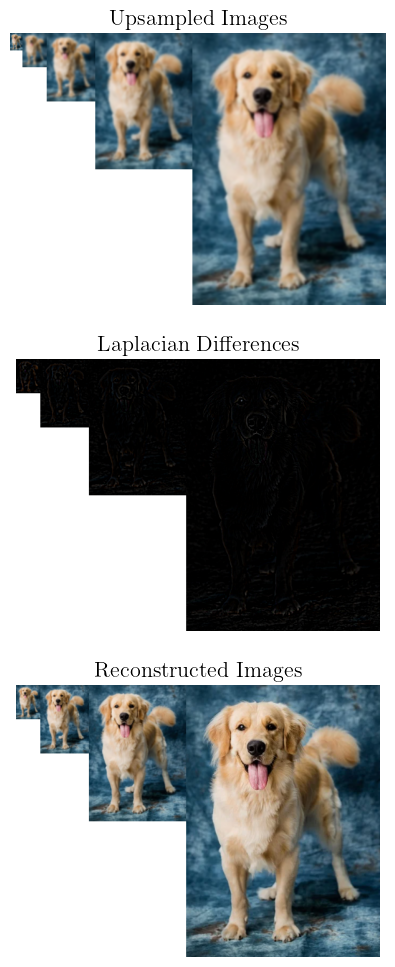

In [4]:
# Load an image
image_cv2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Computer_Vision/CV_figs/dog.PNG', 1)
image = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)/255.0

# Generate the Gaussian pyramid
gaussian_pyr = gaussian_pyramid(image, levels=5, ksize=5, sigma=1)
# Generate the Laplace pyramid
laplace_pyr = laplace_pyramid(gaussian_pyr)

# concatenate images side by side with a white background (for plotting)
def concatenate_images(images):
    max_height = max(img.shape[0] for img in images)
    total_width = sum(img.shape[1] for img in images)
    concatenated_image = np.ones((max_height, total_width, 3))  # White background

    current_x = 0
    for img in images:
        height, width = img.shape[:2]
        concatenated_image[:height, current_x:current_x + width] = img
        current_x += width

    return concatenated_image

# Reconstruction process with visualization
reconstructed_images = []
upsampled_images = []
reconstructed_image = laplace_pyr[-1]  # starting point of reconstrcution proces
upsampled_images.append(reconstructed_image)

for i in range(len(laplace_pyr) - 1, 0, -1): # start from the last image (the smallest one) and go back until the largest one
    upsampled_image = cv2.pyrUp(reconstructed_image)  # upsample
    upsampled_image = cv2.resize(upsampled_image, (laplace_pyr[i-1].shape[1], laplace_pyr[i-1].shape[0]))  # verify proper dimension for addition due to up to one pixel change because on upsampling/dowsampling
    upsampled_images.append(upsampled_image)
    reconstructed_image = upsampled_image + laplace_pyr[i-1]
    reconstructed_images.append(reconstructed_image)

# Concatenate all reconstructed images
concatenated_reconstructed = concatenate_images(reconstructed_images[::1])  # Reverse to start with the smallest image
# Concatenate all upsampled images
concatenated_upsampled = concatenate_images(upsampled_images[::1])  # Reverse to start with the smallest image
# Concatenate all Laplacian differences
concatenated_laplacian = concatenate_images(laplace_pyr[:-1][::-1])  # Reverse and exclude the smallest image as we only plot differences

# Plot the final concatenated images
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)
plt.imshow(concatenated_upsampled)
plt.title('Upsampled Images')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(concatenated_laplacian)
plt.title('Laplacian Differences')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(concatenated_reconstructed)
plt.title('Reconstructed Images')
plt.axis('off')

plt.show()

## **Image Blending**

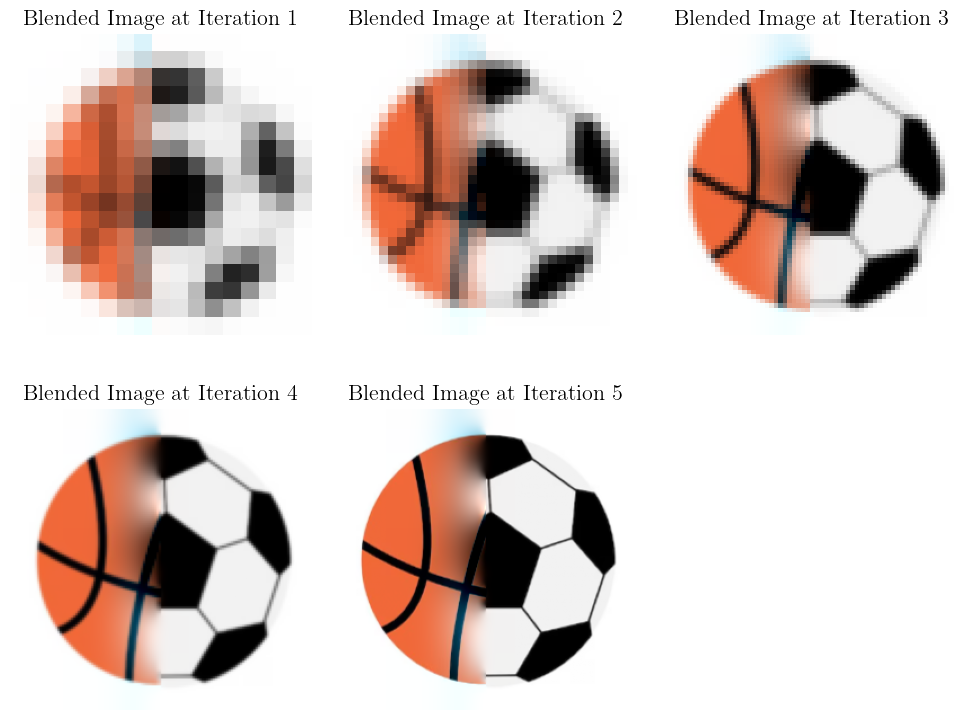

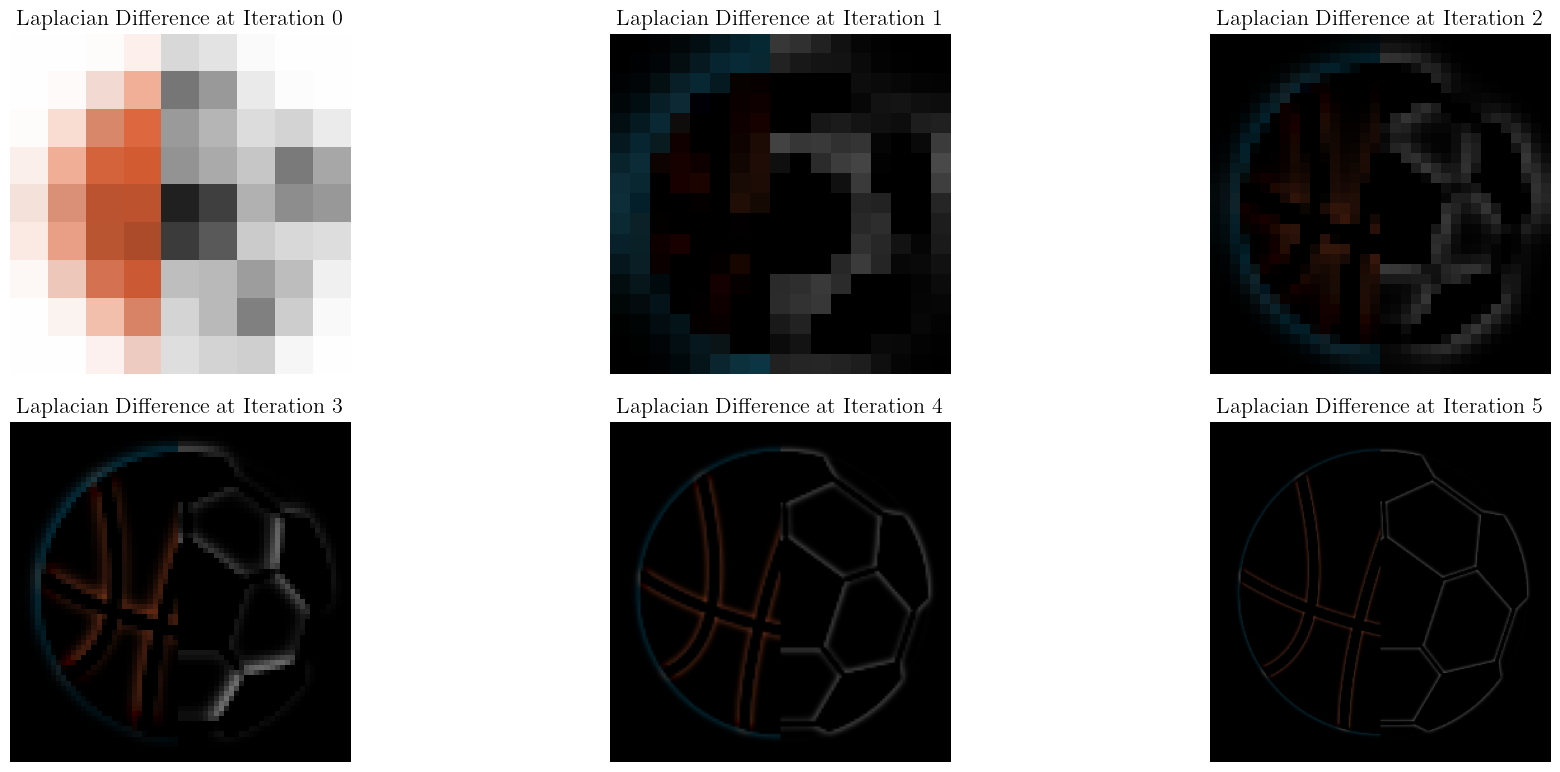

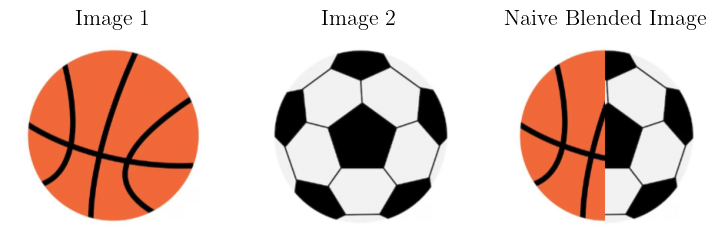

In [67]:
# Function to blend two Laplacian pyramids and reconstruct the image
def blend_pyramids(lap_pyr1, lap_pyr2):
    # takes two Laplacian pyramids as input
    blended_pyramid = []

    # Concatenate corresponding layers from the two pyramids
    for l1, l2 in zip(lap_pyr1, lap_pyr2):
        rows, cols, dpt = l1.shape
        blended_layer = np.hstack((l1[:, :cols // 2], l2[:, cols // 2:]))
        blended_pyramid.append(blended_layer)

    # Reconstruct the blended image
    reconstructed_image = blended_pyramid[-1]
    plt.figure(figsize=(10, 8))
    for i in range(len(blended_pyramid) - 2, -1, -1):
        reconstructed_image = cv2.pyrUp(reconstructed_image)  # upsample
        reconstructed_image = cv2.resize(reconstructed_image, (blended_pyramid[i].shape[1], blended_pyramid[i].shape[0]))  # same note as earlier codes
        reconstructed_image = reconstructed_image + blended_pyramid[i]

        # Display the current blended image
        plt.subplot(2, len(blended_pyramid)//2, len(blended_pyramid) - i - 1)
        plt.imshow(reconstructed_image)
        plt.title(f'Blended Image at Iteration {len(blended_pyramid) - i - 1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    return reconstructed_image, blended_pyramid

# Load two images
image_cv2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Computer_Vision/CV_figs/ball_basket.png', 1)
image1 = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)/255.0
image_cv2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Computer_Vision/CV_figs/ball_soccer.png', 1)
image2 = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)/255.0


# Ensure the images are the same size
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Generate Gaussian and Laplacian pyramids for both images (use even number of levels)
levels = 6
gaussian_pyr1 = gaussian_pyramid(image1, levels=levels)
gaussian_pyr2 = gaussian_pyramid(image2, levels=levels)
laplace_pyr1 = laplace_pyramid(gaussian_pyr1)
laplace_pyr2 = laplace_pyramid(gaussian_pyr2)

# Blend the Laplacian pyramids and reconstruct the final blended image
blended_image, blended_pyramid = blend_pyramids(laplace_pyr1, laplace_pyr2)

plt.figure(figsize=(20, 8))
for i in range(len(blended_pyramid) - 1, -1, -1):
    plt.subplot(2, len(blended_pyramid)//2, len(blended_pyramid) - i)
    plt.imshow(blended_pyramid[i])
    plt.title(f'Laplacian Difference at Iteration {len(blended_pyramid) - i - 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

naive_blended_layer = np.hstack((image1[:, :image1.shape[1] // 2], image2[:, image1.shape[1] // 2:]))
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(naive_blended_layer)
plt.title('Naive Blended Image')
plt.axis('off')
plt.show()